In [1]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "nonuniform.png"
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

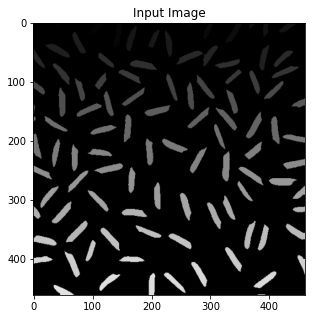

In [3]:
plt.figure(figsize=(5,5))
plt.imshow(image, cmap = 'gray')
plt.title('Input Image')
plt.show()

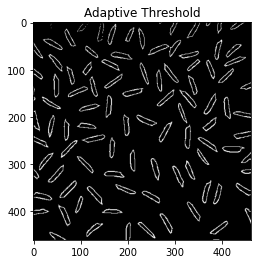

In [4]:
image_thresh = cv2.adaptiveThreshold (image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, -0.27)

plt.imshow(image_thresh, "gray")
plt.title("Adaptive Threshold")
plt.show()

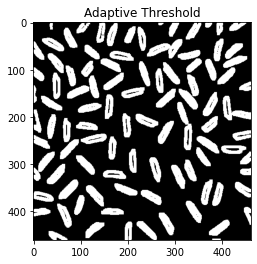

In [5]:
kernel = np.ones((6,6),np.uint8)
image_dilate = cv2.dilate(image_thresh, kernel)

plt.imshow(image_dilate, "gray")
plt.title("Adaptive Threshold")
plt.show()

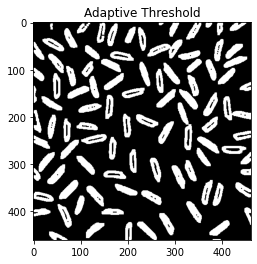

In [6]:
kernel = np.ones((2,2),np.uint8)
image_erode = cv2.erode(image_dilate, kernel)

plt.imshow(image_erode, "gray")
plt.title("Adaptive Threshold")
plt.show()

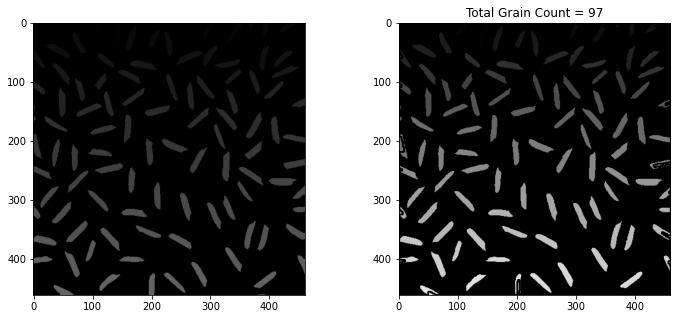

In [7]:
image_final = image_erode

cnts = cv2.findContours(image_final.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
def display(img,count,cmap="gray"):
    f_image = cv2.imread(filename)
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Grain Count = {}".format(count))

for (i, c) in enumerate(cnts):
    cv2.drawContours(image, [c], -1, (0, 255, 0), 2)

display(image,len(cnts))